In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("aerofit_treadmill.txt")

In [3]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### 1.	Defining Problem Statement and Analysing basic metrics
1.	Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


> 1. Shape of the data is (180, 9) i.e., 180 rows of data for 9 columns.
> 2. Also, there is no missing value in the dataset, since non-null count for all columns of data is same.
> 3. For Catrgorical columns like Product, Gender & MaritalStatus; datatype is object (for string type) and for other columns with numerical values, datatype is int as needed.

##### Problem Statement

The data shows the treadmill buyers details, which can give us insights about the sales of the treadmills based on the user data. The factors governing will be,
>1. buyers age group and usage
>2. gender based usage
>3. based Income of user
>4. Fitness of the user
>5. usage governed by maritalstatus

Analysing the above factors will help us to know the new customer type and behaviour predictability.

In [5]:
Gender_count=data['Gender'].value_counts()
Gender_count

Male      104
Female     76
Name: Gender, dtype: int64

In [6]:
Gender_prob=Gender_count/len(data)
Gender_prob

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

> For the given dataset, probability of male buyers for the treadmill is 0.58, whereas, for female buyers the probability is 0.42.

In [7]:
MaritalStatus_count=data['MaritalStatus'].value_counts()
MaritalStatus_prob=MaritalStatus_count/len(data)
MaritalStatus_prob

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

> For the given dataset, probability of Partnered buyers for the treadmill is 0.59, whereas, for Single buyers the probability is 0.41.

In [8]:
ProductType_count=data['Product'].value_counts()
ProductType_prob=ProductType_count/len(data)
ProductType_prob

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

> If we see about the product type, probability of KP281 type treadmill product is 0.44, for KP481 type the probability is 0.33 and for KP781 type the probability is 0.22.

In [9]:
Product_Gender_rel=pd.crosstab(data['Product'],data['Gender'])
Product_Gender_rel

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


> The Above calculation gives us Product type vs Gender intersection count for each values.
> For example, there are 31 Male buyers for KP481 treadmill product type.

In [10]:
Product_Gender_prob=Product_Gender_rel/len(data)
Product_Gender_prob

Gender,Female,Male
Product,,
KP281,0.222222,0.222222
KP481,0.161111,0.172222
KP781,0.038889,0.183333


> Above calculation shows us the Gender intersection Product values probability . For example, prob(KP781 intersection Male) = 0.183

### 2.	Non-Graphical Analysis: Value counts and unique attributes

In [11]:
# p(KP781 sales | Male) = p(KP781 n Male)/p(Male)

prob_of_KP781sales_for_men = Product_Gender_prob['Male']['KP781']/Gender_prob['Male']
round(prob_of_KP781sales_for_men,2)

0.32

> Probability of KP781 sales for Male customers is calculated above as 0.32. The calculation is done using Conditional Probability formula.

In [12]:
# p(Male | KP781 sales) = p(KP781 n Male)/p(KP781)

prob_of_Men_buying_KP781 = Product_Gender_prob['Male']['KP781']/ProductType_prob['KP781']
round(prob_of_Men_buying_KP781,2)

0.82

> Probability of Male buying KP781 product is calculated above as 0.82.The calculation is done using Conditional Probability formula.

In [13]:
# Also p(Male | KP781 sales) = ( p(KP781 sales | Male) * p(Male) ) / p(KP781)

prob_of_Men_buying_KP781_2ndMethod = (prob_of_KP781sales_for_men * Gender_prob['Male'])/ProductType_prob['KP781']
round(prob_of_Men_buying_KP781_2ndMethod,2)

0.82

> Also, Probability of Male buying KP781 product is calculated above using Baye's Theorem and the value is same as calculted using conditional probability.

In [14]:
Product_MaritalStatus_rel=pd.crosstab(data['Product'],data['MaritalStatus'])
Product_MaritalStatus_prob=Product_MaritalStatus_rel/len(data)
Product_MaritalStatus_prob

MaritalStatus,Partnered,Single
Product,,
KP281,0.266667,0.177778
KP481,0.200000,0.133333
KP781,0.127778,0.094444


> Law of Total Probability is defined as,
>> p(KP481) = p(KP481 n Partnered) + p(KP481 n Single)

In [15]:
KP481_prob_by_totalprob=Product_MaritalStatus_prob['Partnered']['KP481'] + Product_MaritalStatus_prob['Single']['KP481']
KP481_prob_by_totalprob, ProductType_prob['KP481']

(0.33333333333333337, 0.3333333333333333)

> Here, we calculted the probabilty of sales of KP481 product type, using total probability and we compared it with the simple probability formula i.e., No. of Occurance/Total Event, and both the values are same.

In [16]:
data[['Usage','Miles','Fitness']].corr()

,Usage,Miles,Fitness
Usage,1.000000,0.759130,0.668606
Miles,0.759130,1.000000,0.785702
Fitness,0.668606,0.785702,1.000000


> In the above calculated values, we can see that Usage, Miles & Fitness have high positive relativity. That means, one value impacts another.

### 3.	Visual Analysis - Univariate & Bivariate
1.	For continuous variable(s): Distplot, countplot, histogram for univariate analysis
2.	For categorical variable(s): Boxplot
3.	For correlation: Heatmaps, Pairplots

C:\Users\amank\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

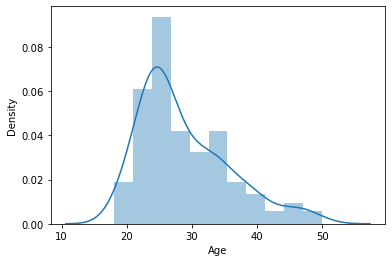

In [17]:
sns.distplot(data['Age'])

> In the above distplot visual, it's a density curve for Age of buyers for the treadmill. We can see that, age ranging from 20 to 30 years old are more frequent buyers of the treadmill.

<AxesSubplot:xlabel='Fitness', ylabel='count'>

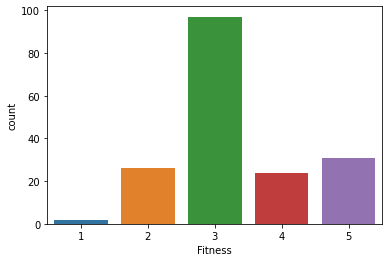

In [18]:
sns.countplot(data=data,x='Fitness')

> Above count plot is for the Fitness self rating provided by the buyers the higher number of customer's had rated themselves as 3 for Fitness.

<AxesSubplot:xlabel='Usage', ylabel='Count'>

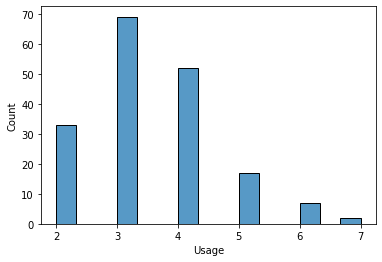

In [19]:
sns.histplot(data=data['Usage'])

> Above Viz is a histplot dipicting the count for the usage i.e., average number of times the customer plans to use the treadmill each week. And, most of the uesers use it for 3 to 4 times a week.

<AxesSubplot:xlabel='Product', ylabel='Miles'>

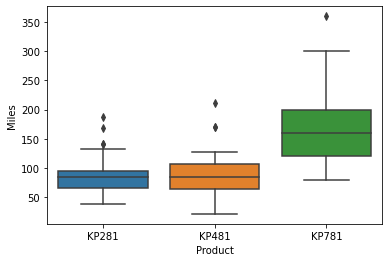

In [20]:
sns.boxplot(y="Miles",x="Product",data=data)

> The boxplot for Product vs Miles shows that users who bought KP781 Product run for more miles than the other 2 types.

<AxesSubplot:xlabel='Fitness', ylabel='Product'>

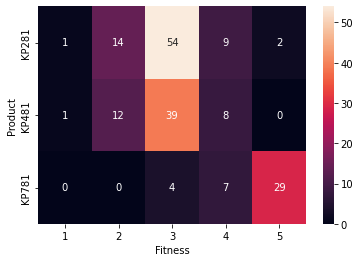

In [21]:
sns.heatmap(pd.crosstab(data['Product'],data['Fitness']),annot=True)

> Above heatmap for Product type vs Fitness shows that buyers rating themselves as 3 have bought KP481 & KP281, products more often. Also, KP781 product which is also have highest cost is bought by customers who rated themselves as 5 in fitness.

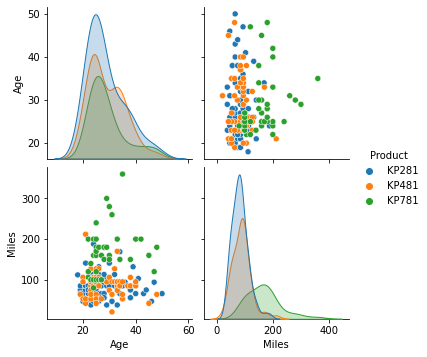

In [22]:
sns.pairplot(data[["Product",'Age','Miles']],hue="Product")

> The above pairplot compares the relativity between Age of buyers and Miles run by them.Irrespective of age, users who bought KP781 product type have run the treadmile for more miles.

### 4.	Missing Value & Outlier Detection 

In [23]:
pd.isnull(data).value_counts()

Product  Age    Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
False    False  False   False      False          False  False    False   False    180
dtype: int64

> As we can see from above calculation, value count for non-null data for each column in the dataset is 180, which is the overall count of row data. That implies, there is NO MISSING VALUE in the provided dataset.

<AxesSubplot:xlabel='Product', ylabel='Age'>

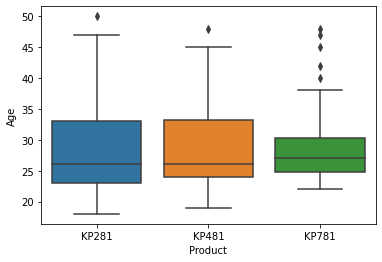

In [24]:
sns.boxplot(y="Age",x="Product",data=data)

> The above boxplot for Age vs Product shows that, there are more outliers for KP781 product tpye. That means, distribution of the age of users for KP781 has significant number of outliers.

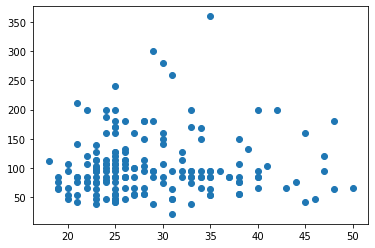

In [25]:
plt.scatter(data['Age'],data['Miles'])

> Scatter plot is also a way to detect the outliers. Here, we can see that most of the users age range from 20 to 40, and the miles run buy them ranges from 50 to 250 miles. But beyond that, there lies the outliers, specially for the users who have run for more than 250 miles.

### 5.	Business Insights based on Non-Graphical and Visual 

> 1. Male & Partnered people are more likely to buy the product.
> 2. People rating themselves higher tend to run more miles of the treadmills.
> 3. There are most number of buyer around age 25.
> 4. People rating themselves 3 are more likely to buy the product.
> 5. More number of users use the treadmill 3-4 times a week.
> 6. Customers buying KP781 type are running for more miles than the other 2 types.
> 7. Customers rating themselves 1 as fitness are very less likely to buy any product.
> 8. Customers rating themselves 5 as fitness are very more likely to buy KP781 product type.
> 9. There are not many customers who run for more than 250 miles.
> 10. People aged above 40 are more likely to buy KP781 product type of treadmill.

### 6.	Recommendations

> 1. Sale of KP281 product type for treadmill is more, compared to other 2 types. So, the stock should be maintained as such.
> 2. Introduce some offer to increase the sale for KP781 product type, especially for Female customers, since the sale is low for this type. Also, the cost of higher for this type. So, this can be one of the reasons.
> 3. Around 80% of KP781 buyers are Male. So, the enhancement and upgrades can be done taking the Male customers usage data in mind.
> 4. Training programs can be introduced in order to engage people with low fitness ratings.
> 5. Introduce rental services for treadmills to single or low age-low income section of customers, in order to increase users.